In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Add this line to display plots inline in Jupyter Notebook
%matplotlib inline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score,f1_score, roc_curve
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.combine import SMOTEENN
from sklearn.model_selection import GridSearchCV

In [2]:
pd.set_option('display.max_columns', 25)  # Display all columns
pd.set_option('display.max_rows', 1000)     # Display all rows

We are using this dataset from kaggle: https://www.kaggle.com/datasets/dermisfit/fraud-transactions-dataset?select=fraudTrain.csv

This dataset is divied into train and test, and has the same 23 columns..<br>
train : 1.30m <br>
test : 556k

In [3]:
df_train = pd.read_csv('DataSet\\archive (3)\\fraudTrain.csv')

# Data Exploration:

In [4]:
df_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [5]:
df_train.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [7]:
df_train.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

Does't have any empty value.
If this DataSet has any empty values we use this code:

In [8]:
# df['Age'].fillna(df['Age'].mean(), inplace=True)
# df['Age'] = df['Age'].round()
# df['Cabin'].fillna('missing',inplace=True)
# df['Embarked'].fillna('missing',inplace=True)
"""
This code filled numerical empty value with mean of the whole column and
filled string type values with 'missing' string which represents category of its own.
"""

"\nThis code filled numerical empty value with mean of the whole column and\nfilled string type values with 'missing' string which represents category of its own.\n"

is_fraud
0    1289169
1       7506
Name: count, dtype: int64


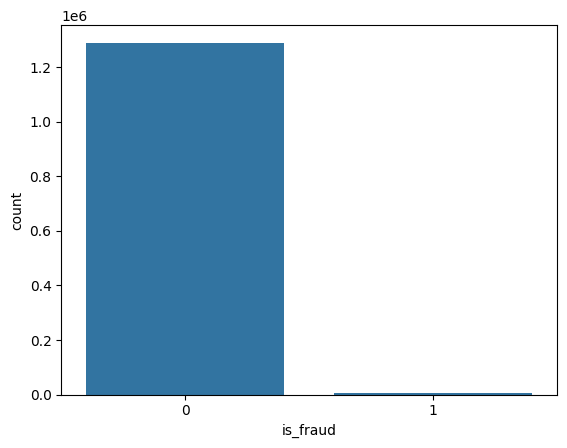

In [9]:
ax = sns.countplot(x='is_fraud', data=df_train)
print(df_train['is_fraud'].value_counts())

In [10]:
lenght_Fraud =  len(df_train[df_train['is_fraud']==1])
lenght_notFraud = len(df_train[df_train['is_fraud']==0])
total_lenght = len(df_train['is_fraud'])

In [11]:
print(f'Percentage of Fraud ratio in DataSet is {lenght_Fraud/total_lenght*100:.2f}% Fraud Representation and {lenght_notFraud/total_lenght*100:.2f}% Not Fraud Representation')

Percentage of Fraud ratio in DataSet is 0.58% Fraud Representation and 99.42% Not Fraud Representation


It clearly show class Imbalance. To overcome this problem we going to use
class_weight='balanced' from sklearn library.
which uses this formula

<img src="./class_weight_inp_image.png">

# Data Preprocessing:

In [12]:
feature = df_train.columns
feature

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

Now, finding any outliers.

C:\Users\786\AppData\Local\Temp\ipykernel_4264\1980881399.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x='city', y='amt', data=df_train, bins=30, kde=True, palette='viridis')


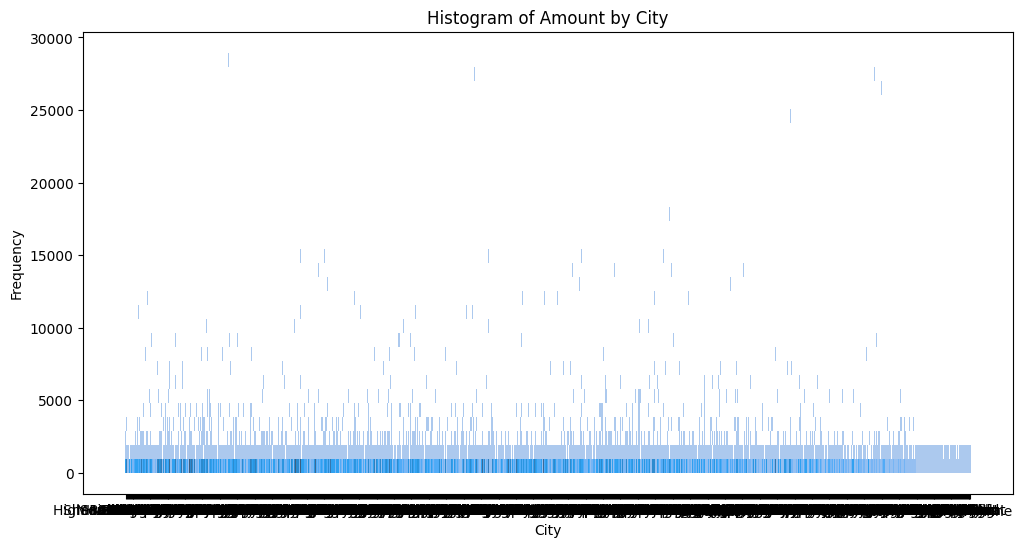

C:\Users\786\AppData\Local\Temp\ipykernel_4264\1980881399.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x='state', y='amt', data=df_train, bins=30, kde=True, palette='viridis')


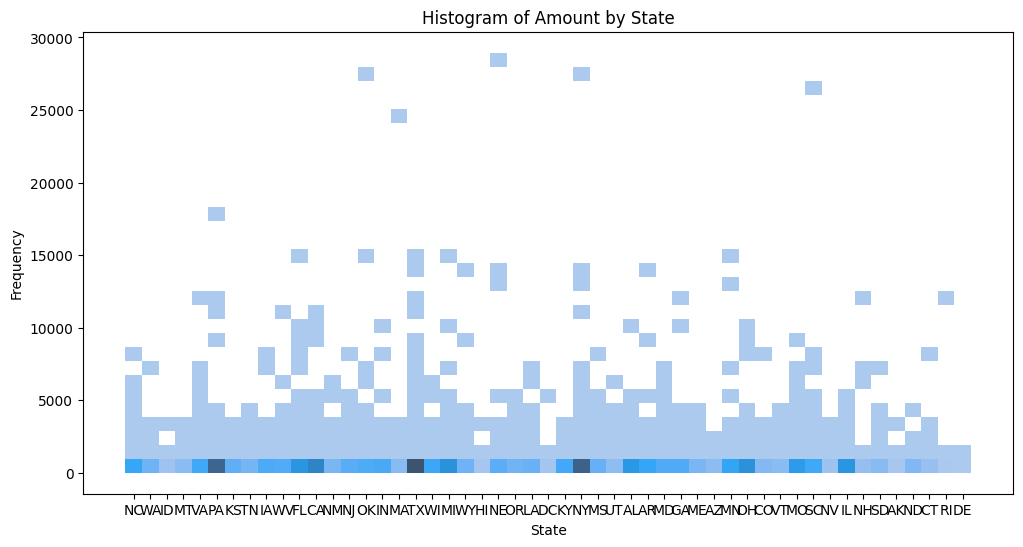

In [13]:
# Create a histogram
plt.figure(figsize=(12, 6))
sns.histplot(x='city', y='amt', data=df_train, bins=30, kde=True, palette='viridis')
plt.title('Histogram of Amount by City')
plt.xlabel('City')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(x='state', y='amt', data=df_train, bins=30, kde=True, palette='viridis')
plt.title('Histogram of Amount by State')
plt.xlabel('State')
plt.ylabel('Frequency')
plt.show()

In [14]:
df_train[df_train['amt']>= 3000]['is_fraud'].value_counts()

is_fraud
0    356
Name: count, dtype: int64

We have nearly 13m rows and nearly few 100s so them are above 3000 and all are not fraud.
so, we going to remove them.

In [15]:
df_train = df_train[df_train['amt'] < 3000]

Drawing scatterplots based on Location of user and merchant

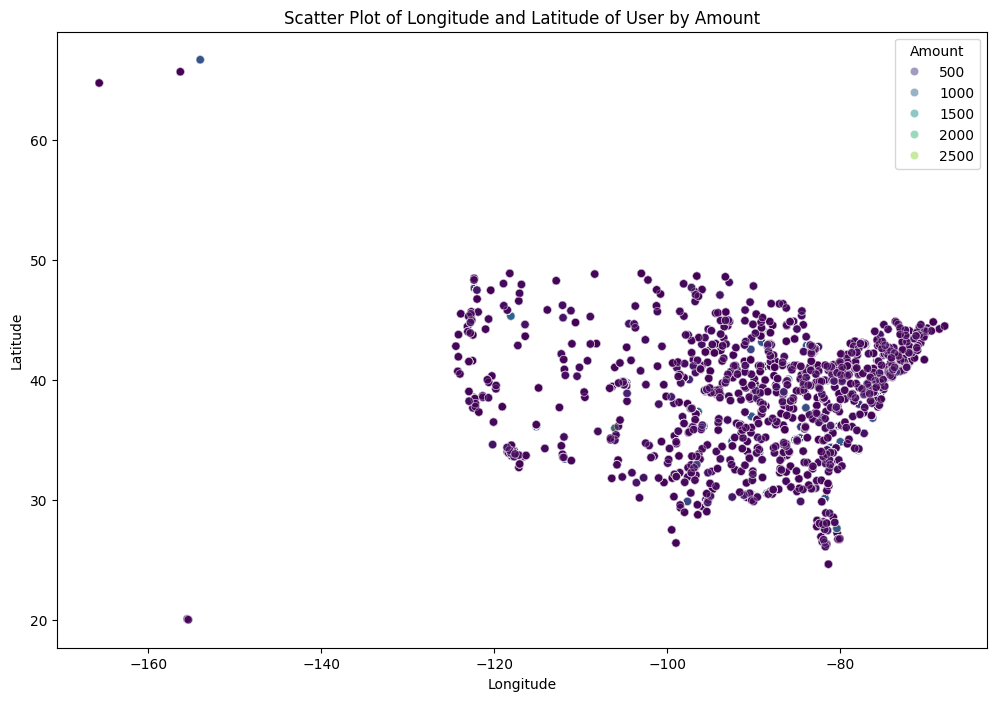

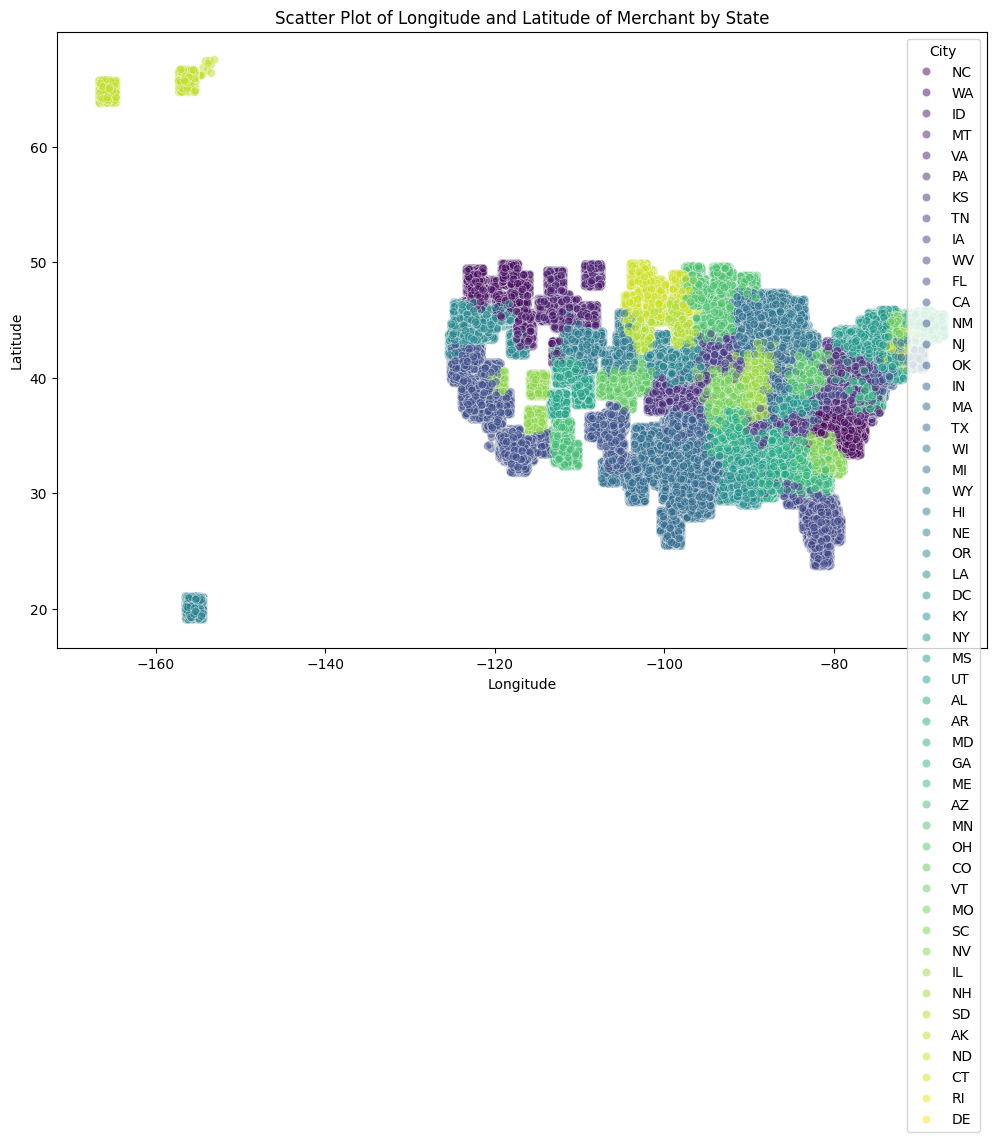

In [16]:
#  df_train is DataFrame
#  creating scatterplot based on user location which latitude and longitude.
plt.figure(figsize=(12, 8))
sns.scatterplot(x='long', y='lat', data=df_train, hue='amt', palette='viridis', alpha=0.5)
plt.title('Scatter Plot of Longitude and Latitude of User by Amount')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Amount', loc='upper right')
plt.show()

#  creating scatterplot based on merchant location.
plt.figure(figsize=(12, 8))
sns.scatterplot(x='merch_long', y='merch_lat', data=df_train, hue='state', palette='viridis', alpha=0.5)
plt.title('Scatter Plot of Longitude and Latitude of Merchant by State')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='City', loc='upper right')
plt.show()

These graph show that 5 users which fall in logitude less than -130 and spend money between 1000 to 2000.<br>
These graph also show that there state are near AK and HI which is in general false indication.<br>
so, We going to check them.

In [17]:
print(f'Number of Credit Card Unique Customer Fall under Above criteria {df_train[df_train["long"] < -130]["first"].unique()}')
print(df_train[df_train["long"] < -130]["is_fraud"].value_counts())
print(df_train[df_train["long"] < -130]["state"].value_counts())

Number of Credit Card Unique Customer Fall under Above criteria ['Brian' 'Mark' 'Cassandra' 'Thomas' 'Bradley']
is_fraud
0    4634
1      43
Name: count, dtype: int64
state
HI    2558
AK    2119
Name: count, dtype: int64


Althrough it considering 13 million row it is a fraction of data shown here.<br>
But faking location must be consider into fraudulent account so we are going to remove the row which is not Fraud.<br>
So, Our model learn the pattern of miss placed location as Fraud.

In [18]:
# number of rows before removed data
df_train.shape

(1296319, 23)

In [19]:
# number of rows after data removed
filtered_rows = df_train[(df_train["long"] < -130) & (df_train['is_fraud']==0)]
df_train.drop(filtered_rows.index, inplace=True)
df_train.shape

(1291685, 23)

Dropping Relevant features

In [20]:
feature

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [21]:
df_train.drop(columns=['Unnamed: 0', 'cc_num','first', 'last', 'unix_time','trans_num'], inplace=True)
feature = df_train.columns
feature

Index(['trans_date_trans_time', 'merchant', 'category', 'amt', 'gender',
       'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job',
       'dob', 'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [22]:
object_columns = df_train.select_dtypes(include='object').columns
int_columns = df_train.select_dtypes(include=['int64','float64']).columns
print('Object Type columns are:\n',object_columns := list(object_columns))
print('Int Type columns are:\n',int_columns := list(int_columns))

Object Type columns are:
 ['trans_date_trans_time', 'merchant', 'category', 'gender', 'street', 'city', 'state', 'job', 'dob']
Int Type columns are:
 ['amt', 'zip', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'is_fraud']


Label Encoding of list ['merchant', 'category', 'street', 'city', 'state', 'job']<br>
So that category convert into numerical form

In [23]:
print(feature)
desired_order =['merchant', 'category', 'street', 'city', 'state', 'job','trans_date_trans_time', 'amt',
                'gender', 'zip', 'lat', 'long', 'city_pop','dob', 'merch_lat', 'merch_long', 'is_fraud']
df_train = df_train[desired_order]
df_train

Index(['trans_date_trans_time', 'merchant', 'category', 'amt', 'gender',
       'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job',
       'dob', 'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')


,merchant,category,street,city,state,job,trans_date_trans_time,amt,gender,zip,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud
0,"fraud_Rippin, Kub and Mann",misc_net,561 Perry Cove,Moravian Falls,NC,"Psychologist, counselling",2019-01-01 00:00:18,4.97,F,28654,36.0788,-81.1781,3495,1988-03-09,36.011293,-82.048315,0
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,43039 Riley Greens Suite 393,Orient,WA,Special educational needs teacher,2019-01-01 00:00:44,107.23,F,99160,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0
2,fraud_Lind-Buckridge,entertainment,594 White Dale Suite 530,Malad City,ID,Nature conservation officer,2019-01-01 00:00:51,220.11,M,83252,42.1808,-112.2620,4154,1962-01-19,43.150704,-112.154481,0
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,9443 Cynthia Court Apt. 038,Boulder,MT,Patent attorney,2019-01-01 00:01:16,45.00,M,59632,46.2306,-112.1138,1939,1967-01-12,47.034331,-112.561071,0
4,fraud_Keeling-Crist,misc_pos,408 Bradley Rest,Doe Hill,VA,Dance movement psychotherapist,2019-01-01 00:03:06,41.96,M,24433,38.4207,-79.4629,99,1986-03-28,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,fraud_Reichel Inc,entertainment,162 Jessica Row Apt. 072,Hatch,UT,Geoscientist,2020-06-21 12:12:08,15.56,M,84735,37.7175,-112.4777,258,1961-11-24,36.841266,-111.690765,0
1296671,fraud_Abernathy and Sons,food_dining,8617 Holmes Terrace Suite 651,Tuscarora,MD,"Production assistant, television",2020-06-21 12:12:19,51.70,M,21790,39.2667,-77.5101,100,1979-12-11,38.906881,-78.246528,0
1296672,fraud_Stiedemann Ltd,food_dining,1632 Cohen Drive Suite 639,High Rolls Mountain Park,NM,Naval architect,2020-06-21 12:12:32,105.93,M,88325,32.9396,-105.8189,899,1967-08-30,33.619513,-105.130529,0
1296673,"fraud_Reinger, Weissnat and Strosin",food_dining,42933 Ryan Underpass,Manderson,SD,Volunteer coordinator,2020-06-21 12:13:36,74.90,M,57756,43.3526,-102.5411,1126,1980-08-18,42.788940,-103.241160,0


In [24]:
df_train

,merchant,category,street,city,state,job,trans_date_trans_time,amt,gender,zip,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud
0,"fraud_Rippin, Kub and Mann",misc_net,561 Perry Cove,Moravian Falls,NC,"Psychologist, counselling",2019-01-01 00:00:18,4.97,F,28654,36.0788,-81.1781,3495,1988-03-09,36.011293,-82.048315,0
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,43039 Riley Greens Suite 393,Orient,WA,Special educational needs teacher,2019-01-01 00:00:44,107.23,F,99160,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0
2,fraud_Lind-Buckridge,entertainment,594 White Dale Suite 530,Malad City,ID,Nature conservation officer,2019-01-01 00:00:51,220.11,M,83252,42.1808,-112.2620,4154,1962-01-19,43.150704,-112.154481,0
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,9443 Cynthia Court Apt. 038,Boulder,MT,Patent attorney,2019-01-01 00:01:16,45.00,M,59632,46.2306,-112.1138,1939,1967-01-12,47.034331,-112.561071,0
4,fraud_Keeling-Crist,misc_pos,408 Bradley Rest,Doe Hill,VA,Dance movement psychotherapist,2019-01-01 00:03:06,41.96,M,24433,38.4207,-79.4629,99,1986-03-28,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,fraud_Reichel Inc,entertainment,162 Jessica Row Apt. 072,Hatch,UT,Geoscientist,2020-06-21 12:12:08,15.56,M,84735,37.7175,-112.4777,258,1961-11-24,36.841266,-111.690765,0
1296671,fraud_Abernathy and Sons,food_dining,8617 Holmes Terrace Suite 651,Tuscarora,MD,"Production assistant, television",2020-06-21 12:12:19,51.70,M,21790,39.2667,-77.5101,100,1979-12-11,38.906881,-78.246528,0
1296672,fraud_Stiedemann Ltd,food_dining,1632 Cohen Drive Suite 639,High Rolls Mountain Park,NM,Naval architect,2020-06-21 12:12:32,105.93,M,88325,32.9396,-105.8189,899,1967-08-30,33.619513,-105.130529,0
1296673,"fraud_Reinger, Weissnat and Strosin",food_dining,42933 Ryan Underpass,Manderson,SD,Volunteer coordinator,2020-06-21 12:13:36,74.90,M,57756,43.3526,-102.5411,1126,1980-08-18,42.788940,-103.241160,0


Make a column Transformer for endcoding.

In [25]:
column_trans = make_column_transformer(
    (OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1), ['merchant', 'category', 'street', 'city', 'state', 'job']),
    remainder='passthrough')

In [26]:
X = column_trans.fit_transform(df_train)

In [27]:
X = pd.DataFrame(X,columns=df_train.columns)
X.head()

,merchant,category,street,city,state,job,trans_date_trans_time,amt,gender,zip,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud
0,514.0,8.0,567.0,525.0,27.0,370.0,2019-01-01 00:00:18,4.97,F,28654,36.0788,-81.1781,3495,1988-03-09,36.011293,-82.048315,0
1,241.0,4.0,434.0,611.0,47.0,428.0,2019-01-01 00:00:44,107.23,F,99160,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0
2,390.0,0.0,601.0,467.0,13.0,307.0,2019-01-01 00:00:51,220.11,M,83252,42.1808,-112.262,4154,1962-01-19,43.150704,-112.154481,0
3,360.0,2.0,929.0,84.0,26.0,328.0,2019-01-01 00:01:16,45.0,M,59632,46.2306,-112.1138,1939,1967-01-12,47.034331,-112.561071,0
4,297.0,9.0,417.0,216.0,45.0,116.0,2019-01-01 00:03:06,41.96,M,24433,38.4207,-79.4629,99,1986-03-28,38.674999,-78.632459,0


In [28]:
df_train.head()

,merchant,category,street,city,state,job,trans_date_trans_time,amt,gender,zip,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud
0,"fraud_Rippin, Kub and Mann",misc_net,561 Perry Cove,Moravian Falls,NC,"Psychologist, counselling",2019-01-01 00:00:18,4.97,F,28654,36.0788,-81.1781,3495,1988-03-09,36.011293,-82.048315,0
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,43039 Riley Greens Suite 393,Orient,WA,Special educational needs teacher,2019-01-01 00:00:44,107.23,F,99160,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0
2,fraud_Lind-Buckridge,entertainment,594 White Dale Suite 530,Malad City,ID,Nature conservation officer,2019-01-01 00:00:51,220.11,M,83252,42.1808,-112.2620,4154,1962-01-19,43.150704,-112.154481,0
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,9443 Cynthia Court Apt. 038,Boulder,MT,Patent attorney,2019-01-01 00:01:16,45.00,M,59632,46.2306,-112.1138,1939,1967-01-12,47.034331,-112.561071,0
4,fraud_Keeling-Crist,misc_pos,408 Bradley Rest,Doe Hill,VA,Dance movement psychotherapist,2019-01-01 00:03:06,41.96,M,24433,38.4207,-79.4629,99,1986-03-28,38.674999,-78.632459,0


In [29]:
df_train = X

We are going to use pipe line from sklearn lib to scalar and encode our data.<br>
The main reason for doing because as we know our dataset is divide into train and test files.<br>
So, when we load our dataset we don't to perform this feature prcessing and engineering on test data from scrash.<br>
we pass test data to pipline and our test dataset will ready to use.

# Feature Engineering:

In [30]:
# Extract time-based features
df_train['trans_hour'] = pd.to_datetime(df_train['trans_date_trans_time']).dt.hour
df_train['trans_day_of_week'] = pd.to_datetime(df_train['trans_date_trans_time']).dt.dayofweek

In [31]:
df_train.head()

,merchant,category,street,city,state,job,trans_date_trans_time,amt,gender,zip,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,trans_hour,trans_day_of_week
0,514.0,8.0,567.0,525.0,27.0,370.0,2019-01-01 00:00:18,4.97,F,28654,36.0788,-81.1781,3495,1988-03-09,36.011293,-82.048315,0,0,1
1,241.0,4.0,434.0,611.0,47.0,428.0,2019-01-01 00:00:44,107.23,F,99160,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0,0,1
2,390.0,0.0,601.0,467.0,13.0,307.0,2019-01-01 00:00:51,220.11,M,83252,42.1808,-112.262,4154,1962-01-19,43.150704,-112.154481,0,0,1
3,360.0,2.0,929.0,84.0,26.0,328.0,2019-01-01 00:01:16,45.0,M,59632,46.2306,-112.1138,1939,1967-01-12,47.034331,-112.561071,0,0,1
4,297.0,9.0,417.0,216.0,45.0,116.0,2019-01-01 00:03:06,41.96,M,24433,38.4207,-79.4629,99,1986-03-28,38.674999,-78.632459,0,0,1


Converting dob into Age column

In [32]:
from datetime import datetime

# 'dob' is the column containing date of birth
df_train['dob'] = pd.to_datetime(df_train['dob'])

# Calculate age based on the current date
current_date = datetime.now()
df_train['age'] = (current_date - df_train['dob']).dt.days // 365

# Display the updated DataFrame
print(df_train[['dob', 'age']])

               dob  age
0       1988-03-09   35
1       1978-06-21   45
2       1962-01-19   62
3       1967-01-12   57
4       1986-03-28   37
...            ...  ...
1291680 1961-11-24   62
1291681 1979-12-11   44
1291682 1967-08-30   56
1291683 1980-08-18   43
1291684 1995-08-16   28

[1291685 rows x 2 columns]


In [33]:
print(df_train['trans_day_of_week'].unique(),df_train['trans_hour'].unique())

[1 2 3 4 5 6 0] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [34]:
df_train.drop(columns=['trans_date_trans_time', 'dob'], inplace=True)
feature = df_train.columns
feature

Index(['merchant', 'category', 'street', 'city', 'state', 'job', 'amt',
       'gender', 'zip', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long',
       'is_fraud', 'trans_hour', 'trans_day_of_week', 'age'],
      dtype='object')

Creating a new column where High Risk Merchants denoted by 1 else 0.

In [35]:
HighRiskMerchant = df_train[df_train['is_fraud'] == 1]['merchant'].value_counts()
HighRiskMerchant = HighRiskMerchant[HighRiskMerchant > 20].index.tolist()

# Create 'high_risk_merchant' column
df_train['high_risk_merchant'] = np.where(df_train['merchant'].isin(HighRiskMerchant), 1, 0)

In [36]:
df_train['high_risk_merchant'].value_counts()

high_risk_merchant
0    1023168
1     268517
Name: count, dtype: int64

Now adding High risk states, cities, High Risk week days, high risk job( finding people with similar jobs commit fraud )

In [37]:
HighRiskCity =  df_train[df_train['is_fraud'] == 1]['city'].value_counts().index.tolist()
df_train['high_risk_city'] = np.where(df_train['city'].isin(HighRiskCity) & df_train['city_pop']>1000, 1, 0)
HighRiskState =  df_train[df_train['is_fraud'] == 1]['state'].value_counts().index.tolist()
df_train['high_risk_state'] =  np.where(df_train['state'].isin(HighRiskState) , 1, 0)
HighRiskJob =  df_train[df_train['is_fraud'] == 1]['job'].value_counts()
HighRiskJob = HighRiskJob[HighRiskJob > 10].index.tolist()
df_train['high_risk_job'] = np.where(df_train['job'].isin(HighRiskJob), 1, 0)

In [38]:
feature = df_train.columns
print(feature)
object_columns = df_train.select_dtypes(include='object').columns
int_columns = df_train.select_dtypes(include=['int32','int64','float32','float64']).columns
print('Object Type columns are:\n',object_columns := list(object_columns))
print('Int Type columns are:\n',int_columns := list(int_columns))

Index(['merchant', 'category', 'street', 'city', 'state', 'job', 'amt',
       'gender', 'zip', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long',
       'is_fraud', 'trans_hour', 'trans_day_of_week', 'age',
       'high_risk_merchant', 'high_risk_city', 'high_risk_state',
       'high_risk_job'],
      dtype='object')
Object Type columns are:
 ['merchant', 'category', 'street', 'city', 'state', 'job', 'amt', 'gender', 'zip', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'is_fraud']
Int Type columns are:
 ['trans_hour', 'trans_day_of_week', 'age', 'high_risk_merchant', 'high_risk_city', 'high_risk_state', 'high_risk_job']


In [39]:
object_columns.remove('gender')
object_columns

['merchant',
 'category',
 'street',
 'city',
 'state',
 'job',
 'amt',
 'zip',
 'lat',
 'long',
 'city_pop',
 'merch_lat',
 'merch_long',
 'is_fraud']

In [40]:
df_train[object_columns] = df_train[object_columns].astype(float)
object_columns = df_train.select_dtypes(include='object').columns
int_columns = df_train.select_dtypes(include=['int32','int64','float32','float64']).columns
print('Object Type columns are:\n',object_columns := list(object_columns))
print('Int Type columns are:\n',int_columns := list(int_columns))

Object Type columns are:
 ['gender']
Int Type columns are:
 ['merchant', 'category', 'street', 'city', 'state', 'job', 'amt', 'zip', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'is_fraud', 'trans_hour', 'trans_day_of_week', 'age', 'high_risk_merchant', 'high_risk_city', 'high_risk_state', 'high_risk_job']


In [41]:
int_columns.remove('is_fraud')

In [42]:
df_train.head()

,merchant,category,street,city,state,job,amt,gender,zip,lat,long,city_pop,merch_lat,merch_long,is_fraud,trans_hour,trans_day_of_week,age,high_risk_merchant,high_risk_city,high_risk_state,high_risk_job
0,514.0,8.0,567.0,525.0,27.0,370.0,4.97,F,28654.0,36.0788,-81.1781,3495.0,36.011293,-82.048315,0.0,0,1,35,0,0,1,0
1,241.0,4.0,434.0,611.0,47.0,428.0,107.23,F,99160.0,48.8878,-118.2105,149.0,49.159047,-118.186462,0.0,0,1,45,1,0,1,1
2,390.0,0.0,601.0,467.0,13.0,307.0,220.11,M,83252.0,42.1808,-112.2620,4154.0,43.150704,-112.154481,0.0,0,1,62,0,0,1,0
3,360.0,2.0,929.0,84.0,26.0,328.0,45.00,M,59632.0,46.2306,-112.1138,1939.0,47.034331,-112.561071,0.0,0,1,57,0,0,1,1
4,297.0,9.0,417.0,216.0,45.0,116.0,41.96,M,24433.0,38.4207,-79.4629,99.0,38.674999,-78.632459,0.0,0,1,37,0,0,1,0


These columns ['merchant', 'category', 'street', 'city', 'state', 'job'] already Ordinal encodered

# Model Selection

Using Logistc Regression from Sklearn because it is a classification problem.

In [43]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

# Model Training

Data is already split in Two file Test and Train.<br>
But first we check accuracy to train dataset and then on Test dataset which give us the fair
Model evalutaion about overfitting and underfitting.


### Make Column Transformer for scaling and encoding columns Scaling and Encoding.
So, when next batch of data came in our case test data comes it encoded accordingly.

In [44]:
# Column Transformer 2
column_trans_2 = make_column_transformer(
    (StandardScaler(), int_columns),
    (OneHotEncoder(), ['gender'])
)

In [45]:
# Combine transformer into a single pipeline
pipe = make_pipeline(column_trans_2,LogisticRegression(max_iter=10000))

In [46]:
# Separate target variable and features
y_train = df_train['is_fraud']
X_train = df_train.drop(columns='is_fraud')
print(y_train.shape)
print(X_train.shape)

(1291685,)
(1291685, 21)


In [47]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['merchant', 'category',
                                                   'street', 'city', 'state',
                                                   'job', 'amt', 'zip', 'lat',
                                                   'long', 'city_pop',
                                                   'merch_lat', 'merch_long',
                                                   'trans_hour',
                                                   'trans_day_of_week', 'age',
                                                   'high_risk_merchant',
                                                   'high_risk_city',
                                                   'high_risk_state',
                                                   'high_risk_job']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['gender'])])),
                ('logisticregression', LogisticRegression(max_iter=10000))])

# Cross Validation Score

Commented because it take too much time and dataset is too large.

In [48]:
# print(cross_val_score(pipe, X_train, y_train, cv=5, scoring='precision').mean())
# print(cross_val_score(pipe, X_train, y_train, cv=5, scoring='recall').mean())
# cross_val_score(pipe, X_train, y_train, cv=5, scoring='f1').mean()


# numpy.core._exceptions._ArrayMemoryError: Unable to allocate 158. MiB for an array with
# shape (1033348, 20) and data type float64

# Model Evaluation:

We Evaluation data on same train set which we going to compare which test data.

In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
def calculate_various_metrics(y_train,y_pred):
    # Calculate various metrics
    print(f'Accuracy: {accuracy_score(y_train, y_pred)}')
    print(f'Precision: {precision_score(y_train, y_pred)}')
    print(f'Recall: {recall_score(y_train, y_pred)}')
    print(f'F1 Score: {f1_score(y_train, y_pred)}')
    print(f'AUC-ROC: {roc_auc_score(y_train, y_pred)}')

    # Confusion matrix
    conf_matrix = confusion_matrix(y_train, y_pred)
    print('Confusion Matrix:')
    print(conf_matrix)

# Function to change threshold and evaluate the model
def evaluate_at_threshold(y_true, y_prob, threshold):
    y_pred = (y_prob >= threshold).astype(int)
    print(f"Threshold: {threshold}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("Classification Report:")
    print(classification_report(y_true, y_pred))
    print("AUC-ROC Score:")
    print(roc_auc_score(y_true, y_prob))
    print("\n")

In [50]:

# Evaluate the model on the testing set
y_pred = pipe.predict(X_train)
calculate_various_metrics(y_train,y_pred)

Accuracy: 0.9936997023268057
Precision: 0.3236607142857143
Recall: 0.07727151612043698
F1 Score: 0.12475801247580125
AUC-ROC: 0.5381638612296364
Confusion Matrix:
[[1282967    1212]
 [   6926     580]]


These results show our Model Perform very poorly this model fail to pred any True Negitive <br>
Our model is clearly underfit because of class imbalance. tuning hyperparameters, addressing class imbalance.

Using weight balance

In [51]:
pipe = make_pipeline(column_trans_2,LogisticRegression(max_iter=10000,solver='liblinear', class_weight='balanced'))

In [52]:
#fitting model
pipe.fit(X_train,y_train)

# Evaluate the model on the testing set
y_pred = pipe.predict(X_train)

calculate_various_metrics(y_train,y_pred)

Accuracy: 0.9452621962785044
Precision: 0.07640955521595753
Recall: 0.759392486011191
F1 Score: 0.1388482899736919
AUC-ROC: 0.8528705434730537
Confusion Matrix:
[[1215281   68898]
 [   1806    5700]]


In [53]:
pipe = make_pipeline(column_trans_2,LogisticRegression(max_iter=10000,solver='liblinear',penalty='l2',C=0.001, class_weight='balanced'))


# Split the data into training and validation sets
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42,stratify=y_train)


# Fit the model on the training data
pipe.fit(X_train1, y_train1)

# Get predicted probabilities on the validation set
y_prob = pipe.predict_proba(X_val)[:, 1]  # Probability of positive class


# Evaluate at different thresholds
thresholds_to_test = [0.1,0.2,0.5, 0.6, 0.7]
for threshold in thresholds_to_test:
    evaluate_at_threshold(y_val, y_prob, threshold)


Threshold: 0.1
Confusion Matrix:
[[ 15186 241650]
 [    17   1484]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.06      0.11    256836
         1.0       0.01      0.99      0.01      1501

    accuracy                           0.06    258337
   macro avg       0.50      0.52      0.06    258337
weighted avg       0.99      0.06      0.11    258337

AUC-ROC Score:
0.8619757552028964


Threshold: 0.2
Confusion Matrix:
[[102623 154213]
 [   156   1345]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.40      0.57    256836
         1.0       0.01      0.90      0.02      1501

    accuracy                           0.40    258337
   macro avg       0.50      0.65      0.29    258337
weighted avg       0.99      0.40      0.57    258337

AUC-ROC Score:
0.8619757552028964


Threshold: 0.5
Confusion Matrix:
[[243271  13565]
 [   366   1135]]
Classification Report:
 

### Using Weight balance, Reguralization does't help much because of class imbalance size 99.5 by 0.5
So we going to apply undersample on majority class and under sampling on minority class
but first we going to import test dataset because we going to test our model how it behaves on unseen data.

Importing test dataset

In [54]:
df_test = pd.read_csv('DataSet\\archive (3)\\fraudTest.csv')

In [55]:
print(df_test.shape)
df_test.head()

(555719, 23)


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [56]:
print(test_length := df_test['is_fraud'].value_counts())

is_fraud
0    553574
1      2145
Name: count, dtype: int64


In [57]:
print(f"Fraud row %: {test_length[1]/len(df_test)}")
print(f"Not Fraud row %: {test_length[0]/len(df_test)}")

Fraud row %: 0.0038598644278853163
Not Fraud row %: 0.9961401355721147


In [58]:
df_test.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

### Applying Same processes on Test data so they both equaly match in terms of shape and datatype.

In [59]:
df_test = df_test[df_test['amt'] < 3000]
filtered_rows = df_test[(df_test["long"] < -130) & (df_test['is_fraud']==0)]
df_test.drop(filtered_rows.index, inplace=True)
df_test.drop(columns=['Unnamed: 0', 'cc_num','first', 'last', 'unix_time','trans_num'], inplace=True)
# feature = df_test.columns
desired_order =['merchant', 'category', 'street', 'city', 'state', 'job','trans_date_trans_time', 'amt',
                'gender', 'zip', 'lat', 'long', 'city_pop','dob', 'merch_lat', 'merch_long', 'is_fraud']
df_test = df_test[desired_order]

X = column_trans.transform(df_test)
X = pd.DataFrame(X,columns=df_test.columns)

df_test = X

# Extract time-based features
df_test['trans_hour'] = pd.to_datetime(df_test['trans_date_trans_time']).dt.hour
df_test['trans_day_of_week'] = pd.to_datetime(df_test['trans_date_trans_time']).dt.dayofweek

# 'dob' is the column containing date of birth
df_test['dob'] = pd.to_datetime(df_test['dob'])

# Calculate age based on the current date
current_date = datetime.now()
df_test['age'] = (current_date - df_test['dob']).dt.days // 365

df_test.drop(columns=['trans_date_trans_time', 'dob'], inplace=True)

HighRiskMerchant = df_test[df_test['is_fraud'] == 1]['merchant'].value_counts()
HighRiskMerchant = HighRiskMerchant[HighRiskMerchant > 20].index.tolist()

# Create 'high_risk_merchant' column
df_test['high_risk_merchant'] = np.where(df_test['merchant'].isin(HighRiskMerchant), 1, 0)

# Create high_risk_city, high_risk_state, high_risk_job
HighRiskCity =  df_test[df_test['is_fraud'] == 1]['city'].value_counts().index.tolist()
df_test['high_risk_city'] = np.where(df_test['city'].isin(HighRiskCity) & df_test['city_pop']>1000, 1, 0)
HighRiskState =  df_test[df_test['is_fraud'] == 1]['state'].value_counts().index.tolist()
df_test['high_risk_state'] =  np.where(df_test['state'].isin(HighRiskState) , 1, 0)
HighRiskJob =  df_test[df_test['is_fraud'] == 1]['job'].value_counts()
HighRiskJob = HighRiskJob[HighRiskJob > 10].index.tolist()
df_test['high_risk_job'] = np.where(df_test['job'].isin(HighRiskJob), 1, 0)

object_columns = df_test.select_dtypes(include='object').columns
int_columns = df_test.select_dtypes(include=['int32','int64','float32','float64']).columns
print('Object Type columns are:\n',object_columns := list(object_columns))
print('Int Type columns are:\n',int_columns := list(int_columns))
object_columns.remove('gender')

df_test[object_columns] = df_test[object_columns].astype(float)

df_test.head()

Object Type columns are:
 ['merchant', 'category', 'street', 'city', 'state', 'job', 'amt', 'gender', 'zip', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'is_fraud']
Int Type columns are:
 ['trans_hour', 'trans_day_of_week', 'age', 'high_risk_merchant', 'high_risk_city', 'high_risk_state', 'high_risk_job']


,merchant,category,street,city,state,job,amt,gender,zip,lat,long,city_pop,merch_lat,merch_long,is_fraud,trans_hour,trans_day_of_week,age,high_risk_merchant,high_risk_city,high_risk_state,high_risk_job
0,319.0,10.0,359.0,168.0,40.0,287.0,2.86,M,29209.0,33.9659,-80.9355,333497.0,33.986391,-81.200714,0.0,12,6,55,0,0,1,0
1,591.0,10.0,373.0,16.0,44.0,404.0,29.84,F,84002.0,40.3207,-110.4360,302.0,39.450498,-109.960431,0.0,12,6,34,0,0,0,0
2,611.0,5.0,919.0,64.0,34.0,271.0,41.28,F,11710.0,40.6729,-73.5365,34496.0,40.495810,-74.196111,0.0,12,6,53,0,0,1,1
3,222.0,9.0,334.0,802.0,9.0,420.0,60.05,M,32780.0,28.5697,-80.8191,54767.0,28.812398,-80.883061,0.0,12,6,36,0,0,1,0
4,292.0,13.0,582.0,261.0,22.0,204.0,3.19,M,49632.0,44.2529,-85.0170,1126.0,44.959148,-85.884734,0.0,12,6,68,0,0,1,0


In [60]:
# Separate target variable and features
y_test = df_test['is_fraud']
X_test = df_test.drop(columns='is_fraud')
print(y_test.shape)
print(X_test.shape)

(553631,)
(553631, 21)


# Now Evalutating with test data
This test for reference for how much model improved after applying Class Balancing techniques.

In [61]:
# Fit the model on the training data
pipe.fit(X_train, y_train)

# Get predicted probabilities on the validation set
y_prob = pipe.predict_proba(X_test)[:, 1]  # Probability of positive class


# Evaluate at different thresholds
thresholds_to_test = [0.1,0.2,0.5, 0.6, 0.7]
for threshold in thresholds_to_test:
    evaluate_at_threshold(y_test, y_prob, threshold)

Threshold: 0.1
Confusion Matrix:
[[ 95769 455717]
 [    49   2096]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.17      0.30    551486
         1.0       0.00      0.98      0.01      2145

    accuracy                           0.18    553631
   macro avg       0.50      0.58      0.15    553631
weighted avg       1.00      0.18      0.29    553631

AUC-ROC Score:
0.8829343845199189


Threshold: 0.2
Confusion Matrix:
[[313792 237694]
 [   289   1856]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.57      0.73    551486
         1.0       0.01      0.87      0.02      2145

    accuracy                           0.57    553631
   macro avg       0.50      0.72      0.37    553631
weighted avg       1.00      0.57      0.72    553631

AUC-ROC Score:
0.8829343845199189


Threshold: 0.5
Confusion Matrix:
[[534178  17308]
 [   538   1607]]
Classification Report:
 

In [62]:
# y_pred = pipe.predict(X_test)
# x = range(0,len(y_test))

# # Plot the actual vs. predicted values
# plt.scatter(x, y_test, c='blue', marker='o', alpha=0.5)
# plt.plot(x, y_pred, linestyle='--', color='red', linewidth=2)
# plt.xlabel('Actual Values')
# plt.ylabel('Predicted Values')
# plt.title('Actual vs. Predicted Values')
# plt.show()

Text(0.5, 0, 'z')

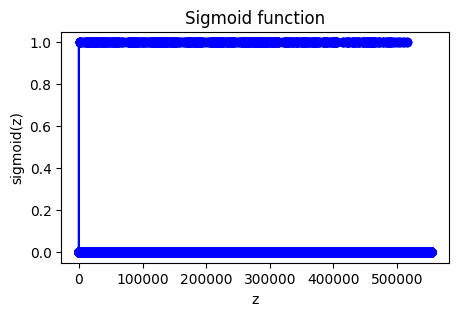

In [63]:
y_pred = pipe.predict(X_test)
x = range(0,len(y_test))
fig,ax = plt.subplots(1,1,figsize=(5,3))
# Plot z vs sigmoid(z)
ax.scatter(x, y_test, c='blue', marker='o', alpha=0.5)
ax.plot(y_prob, y_pred, c="b")
ax.set_title("Sigmoid function")
ax.set_ylabel('sigmoid(z)')
ax.set_xlabel('z')

As predicted With too many columns Model prediction visualization can be very challenging.
Because there

# Performance Improvement:

In [64]:
def evaluate_samply_data(X_train_resampled, y_train_resampled, X_test_resampled, y_test_resampled):
  # shape of resampled test train sample.
  print(f'X_train shape: {X_train_resampled.shape}\ny_train Shape: {y_train_resampled.shape}')
  print(f'X_test shape: {X_test_resampled.shape}\ny_test Shape: {y_test_resampled.shape}')
  # make pipeline
  pipe = make_pipeline(column_trans_2,LogisticRegression(max_iter=10000,solver='liblinear',penalty='l2',C=0.001, class_weight='balanced'))

  # Fit the model on the training data
  pipe.fit(X_train_resampled, y_train_resampled)

  # Get predicted probabilities on the validation set
  y_prob = pipe.predict_proba(X_test_resampled)[:, 1]  # Probability of positive class


  # Evaluate at different thresholds
  thresholds_to_test = [0.3, 0.4, 0.5, 0.6, 0.7]
  for threshold in thresholds_to_test:
      evaluate_at_threshold(y_test_resampled, y_prob, threshold)

In [65]:
def generate_auc_roc_curve(X_train_resampled, y_train_resampled,X_test_resampled ,y_test_resampled):

    pipe = make_pipeline(column_trans_2,LogisticRegression(max_iter=10000,solver='liblinear',penalty='l2',C=0.001, class_weight='balanced'))

    # Fit the model on the training data
    pipe.fit(X_train_resampled, y_train_resampled)

    # Get predicted probabilities on the validation set
    y_pred_proba1 = pipe.predict_proba(X_test_resampled)[:, 1]  # Probability of positive class
    fpr, tpr, thresholds = roc_curve(y_test_resampled,  y_pred_proba1)
    auc = roc_auc_score(y_test_resampled, y_pred_proba1)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass

## 1. Random Under-sampling

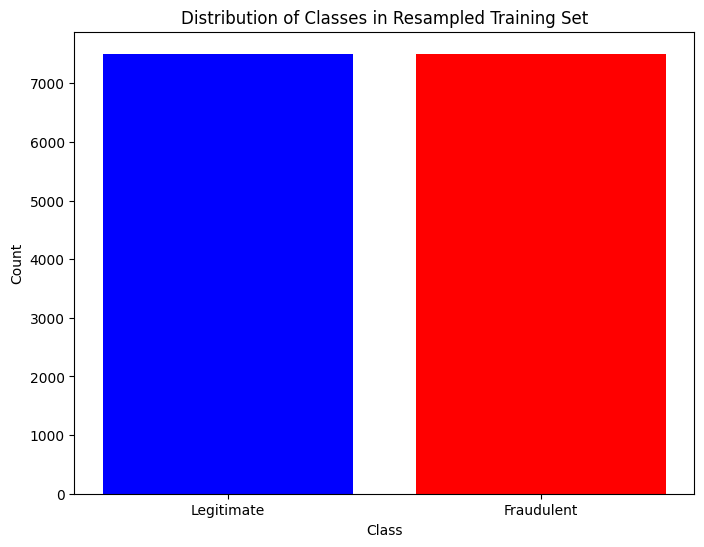

X_train shape: (15012, 21)
y_train Shape: (15012,)
X_test shape: (4290, 21)
y_test Shape: (4290,)
Threshold: 0.3
Confusion Matrix:
[[1594  551]
 [ 372 1773]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.74      0.78      2145
         1.0       0.76      0.83      0.79      2145

    accuracy                           0.78      4290
   macro avg       0.79      0.78      0.78      4290
weighted avg       0.79      0.78      0.78      4290

AUC-ROC Score:
0.892173809096886


Threshold: 0.4
Confusion Matrix:
[[2054   91]
 [ 554 1591]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.96      0.86      2145
         1.0       0.95      0.74      0.83      2145

    accuracy                           0.85      4290
   macro avg       0.87      0.85      0.85      4290
weighted avg       0.87      0.85      0.85      4290

AUC-ROC Score:
0.892173809096886


Threshold: 0

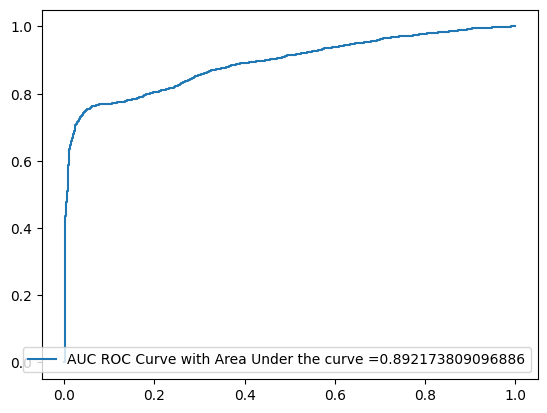

In [66]:
#  Random Under-sampling
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)
X_test_resampled, y_test_resampled = rus.fit_resample(X_test, y_test)

# Plotting bar for the distribution of classes in the resampled training set
plt.figure(figsize=(8, 6))
plt.bar(['Legitimate', 'Fraudulent'], [sum(y_train_resampled == 0), sum(y_train_resampled == 1)], color=['blue', 'red'])
plt.title('Distribution of Classes in Resampled Training Set')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

evaluate_samply_data(X_train_resampled, y_train_resampled, X_test_resampled, y_test_resampled)
generate_auc_roc_curve(X_train_resampled, y_train_resampled, X_test_resampled, y_test_resampled)



### Checking on Cross Validation

In [67]:
cv_accuracy = cross_val_score(pipe, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
cv_f1_score = cross_val_score(pipe, X_train_resampled, y_train_resampled, cv=5, scoring='f1')
print(f'Model Average/generalized Accuracy: {cv_accuracy.mean()}\n Model Average/generalized F1-score: {cv_f1_score.mean()}')

Model Average/generalized Accuracy: 0.8348000655795458
 Model Average/generalized F1-score: 0.8164893556806682


### With Threshold: 0.4 Accuracy 0.85 and F1-score 0.85
Threshold: 0.4<br>
Confusion Matrix:
[[2054   91]
 [ 554 1591]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.96      0.86      2145
         1.0       0.95      0.74      0.83      2145

    accuracy                           0.85      4290
   macro avg       0.87      0.85      0.85      4290
weighted avg       0.87      0.85      0.85      4290

AUC-ROC Score:
0.8921742437826354

It's the best model so far

## 2. Random Over-sampling

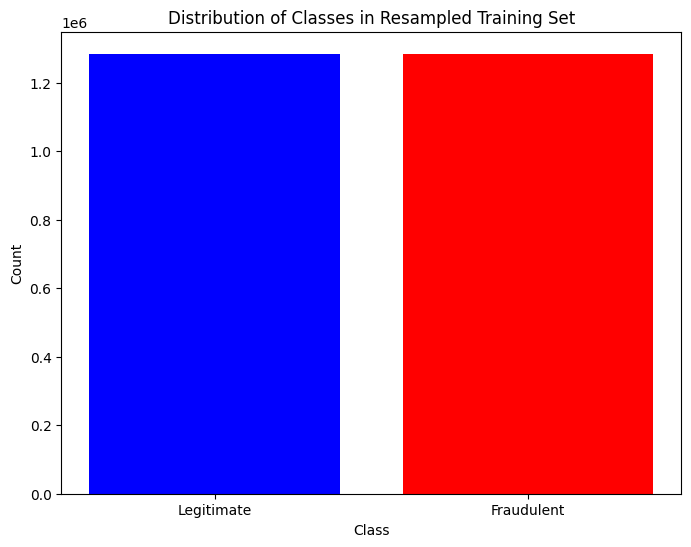

X_train shape: (2568358, 21)
y_train Shape: (2568358,)
X_test shape: (1102972, 21)
y_test Shape: (1102972,)
Threshold: 0.3
Confusion Matrix:
[[458212  93274]
 [119595 431891]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.83      0.81    551486
         1.0       0.82      0.78      0.80    551486

    accuracy                           0.81   1102972
   macro avg       0.81      0.81      0.81   1102972
weighted avg       0.81      0.81      0.81   1102972

AUC-ROC Score:
0.8837928523757526


Threshold: 0.4
Confusion Matrix:
[[515953  35533]
 [127741 423745]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.94      0.86    551486
         1.0       0.92      0.77      0.84    551486

    accuracy                           0.85   1102972
   macro avg       0.86      0.85      0.85   1102972
weighted avg       0.86      0.85      0.85   1102972

AUC-ROC Score:
0.883

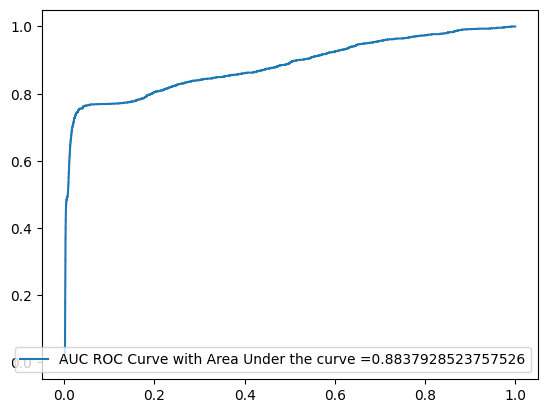

In [68]:
#  Random Over-sampling

ros = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)
X_test_resampled, y_test_resampled = ros.fit_resample(X_test, y_test)

# Plotting bar for the distribution of classes in the resampled training set
plt.figure(figsize=(8, 6))
plt.bar(['Legitimate', 'Fraudulent'], [sum(y_train_resampled == 0), sum(y_train_resampled == 1)], color=['blue', 'red'])
plt.title('Distribution of Classes in Resampled Training Set')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

evaluate_samply_data(X_train_resampled, y_train_resampled, X_test_resampled, y_test_resampled)
generate_auc_roc_curve(X_train_resampled, y_train_resampled, X_test_resampled, y_test_resampled)


In [69]:
cv_accuracy = cross_val_score(pipe, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
cv_f1_score = cross_val_score(pipe, X_train_resampled, y_train_resampled, cv=5, scoring='f1')
print(f'Model Average/generalized Accuracy: {cv_accuracy.mean()}\n Model Average/generalized F1-score: {cv_f1_score.mean()}')

Model Average/generalized Accuracy: 0.8526350294994648
 Model Average/generalized F1-score: 0.8373884420798705


Random Oversampling give a much more stable and Accurate results because it Train on 2.5 Million X and 1.1 Million y data.<br>
### Best result with this method is :
### With Threshold: 0.4 Accuracy 0.85 and F1-score 0.85
Threshold: 0.5 <br>
Confusion Matrix:
[[534720  16766]
 [138658 412828]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.97      0.87    551486
         1.0       0.96      0.75      0.84    551486

    accuracy                           0.86   1102972
AUC-ROC Score:
0.8837941374882067



## 3. SMOTE (Synthetic Minority Over-sampling Technique)

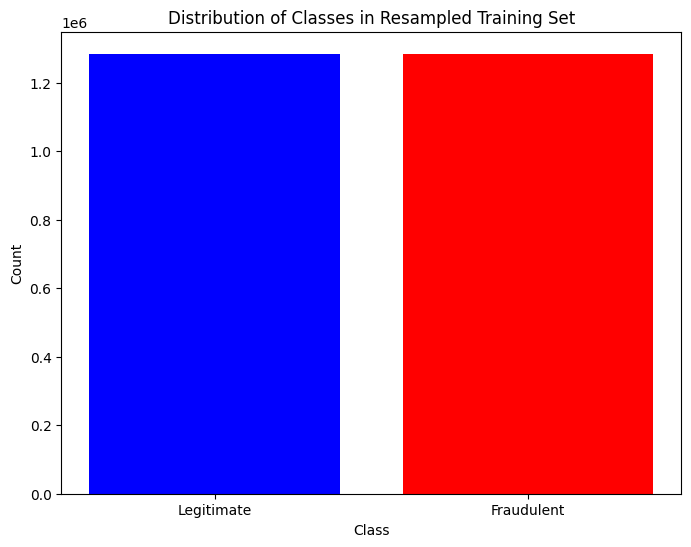

In [70]:
#  SMOTE (Synthetic Minority Over-sampling Technique)
smote = SMOTE(sampling_strategy='auto', random_state=42 )

X1 = column_trans_2.transform(X_train)
X2 = column_trans_2.transform(X_test)

X_train_resampled, y_train_resampled = smote.fit_resample(X1, y_train)
X_test_resampled, y_test_resampled = smote.fit_resample(X2, y_test)

# Plotting bar for the distribution of classes in the resampled training set
plt.figure(figsize=(8, 6))
plt.bar(['Legitimate', 'Fraudulent'], [sum(y_train_resampled == 0), sum(y_train_resampled == 1)], color=['blue', 'red'])
plt.title('Distribution of Classes in Resampled Training Set')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

X_train shape: (2568358, 22)
y_train Shape: (2568358,)
X_test shape: (1102972, 22)
y_test Shape: (1102972,)
Threshold: 0.3
Confusion Matrix:
[[461608  89878]
 [ 88919 462567]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.84      0.84    551486
         1.0       0.84      0.84      0.84    551486

    accuracy                           0.84   1102972
   macro avg       0.84      0.84      0.84   1102972
weighted avg       0.84      0.84      0.84   1102972

AUC-ROC Score:
0.9142991983522012


Threshold: 0.4
Confusion Matrix:
[[513892  37594]
 [110375 441111]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.93      0.87    551486
         1.0       0.92      0.80      0.86    551486

    accuracy                           0.87   1102972
   macro avg       0.87      0.87      0.87   1102972
weighted avg       0.87      0.87      0.87   1102972

AUC-ROC Score:
0.914

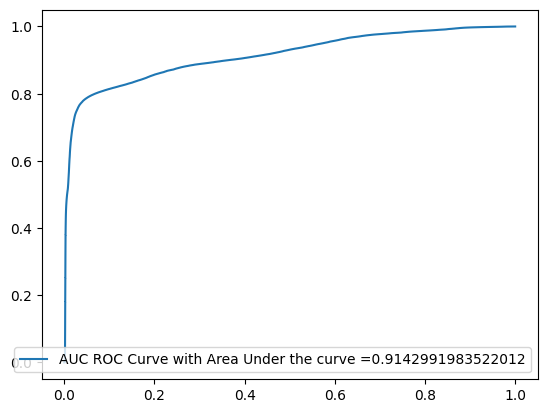

In [71]:
# shape of resampled test train sample.
print(f'X_train shape: {X_train_resampled.shape}\ny_train Shape: {y_train_resampled.shape}')
print(f'X_test shape: {X_test_resampled.shape}\ny_test Shape: {y_test_resampled.shape}')
# make pipeline
lg = LogisticRegression(max_iter=10000,solver='liblinear',penalty='l2',C=0.001, class_weight='balanced')

# Fit the model on the training data
lg.fit(X_train_resampled, y_train_resampled)

# Get predicted probabilities on the validation set
y_pred_proba = lg.predict_proba(X_test_resampled)[:, 1]  # Probability of positive class


# Evaluate at different thresholds
thresholds_to_test = [0.3, 0.4, 0.5, 0.6, 0.7]
for threshold in thresholds_to_test:
    evaluate_at_threshold(y_test_resampled, y_pred_proba, threshold)

fpr, tpr, thresholds = roc_curve(y_test_resampled,  y_pred_proba)
auc = roc_auc_score(y_test_resampled, y_pred_proba)
plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
plt.legend(loc=4)
plt.show()

In [72]:
cv_accuracy = cross_val_score(lg, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
cv_f1_score = cross_val_score(lg, X_train_resampled, y_train_resampled, cv=5, scoring='f1')
print(f'Model Average/generalized Accuracy: {cv_accuracy.mean()}\n Model Average/generalized F1-score: {cv_f1_score.mean()}')

Model Average/generalized Accuracy: 0.8558195548260604
 Model Average/generalized F1-score: 0.841494082171374


Best result with this method is :
With Threshold: 0.5 Accuracy 0.87 and F1-score 0.85<br>
Threshold: 0.5
Confusion Matrix:
[[533367  18119]
 [130061 421425]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.97      0.88    551486
         1.0       0.96      0.76      0.85    551486

    accuracy                           0.87   1102972

AUC-ROC Score:
0.9142991983522012


## 4. SMOTE-ENN (SMOTE and Edited Nearest Neighbors)

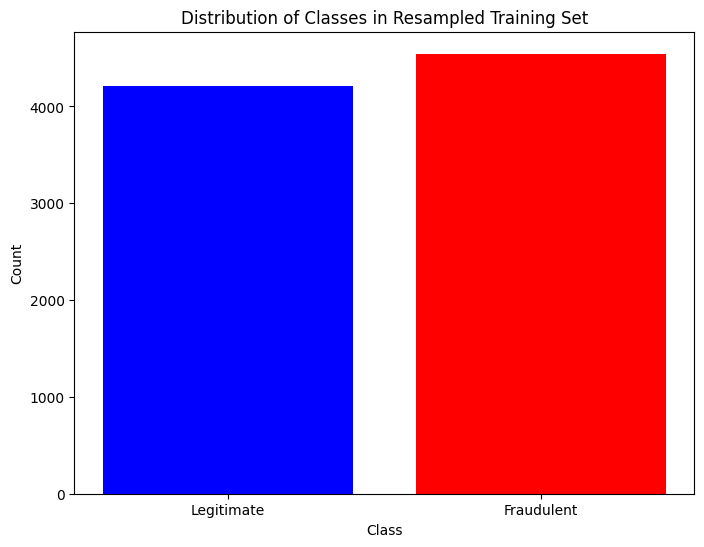

Threshold: 0.3
Confusion Matrix:
[[1340   38]
 [ 250 1267]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.97      0.90      1378
         1.0       0.97      0.84      0.90      1517

    accuracy                           0.90      2895
   macro avg       0.91      0.90      0.90      2895
weighted avg       0.91      0.90      0.90      2895

AUC-ROC Score:
0.9635021761114719


Threshold: 0.4
Confusion Matrix:
[[1368   10]
 [ 379 1138]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.99      0.88      1378
         1.0       0.99      0.75      0.85      1517

    accuracy                           0.87      2895
   macro avg       0.89      0.87      0.86      2895
weighted avg       0.89      0.87      0.86      2895

AUC-ROC Score:
0.9635021761114719


Threshold: 0.5
Confusion Matrix:
[[1376    2]
 [ 531  986]]
Classification Report:
              precision  

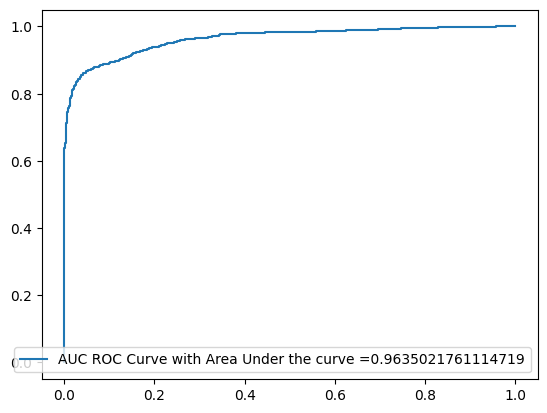

In [73]:
#  SMOTE-ENN (SMOTE and Edited Nearest Neighbors)

# The reason of using RamdomUnderSampler because it takes too much time to run.
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)
X_test_resampled, y_test_resampled = rus.fit_resample(X_test, y_test)

smote_enn = SMOTEENN(sampling_strategy='auto', random_state=42)

X_train_resampled = column_trans_2.transform(X_train_resampled)
X_test_resampled = column_trans_2.transform(X_test_resampled)

X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train_resampled, y_train_resampled)
X_test_resampled, y_test_resampled = smote_enn.fit_resample(X_test_resampled, y_test_resampled)

# Plotting bar for the distribution of classes in the resampled training set
plt.figure(figsize=(8, 6))
plt.bar(['Legitimate', 'Fraudulent'], [sum(y_train_resampled == 0), sum(y_train_resampled == 1)], color=['blue', 'red'])
plt.title('Distribution of Classes in Resampled Training Set')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()
# make pipeline
lg = LogisticRegression(max_iter=10000,solver='liblinear',penalty='l2',C=0.001, class_weight='balanced')

# Fit the model on the training data
lg.fit(X_train_resampled, y_train_resampled)

# Get predicted probabilities on the validation set
y_pred_proba = lg.predict_proba(X_test_resampled)[:, 1]  # Probability of positive class


# Evaluate at different thresholds
thresholds_to_test = [0.3, 0.4, 0.5, 0.6, 0.7]
for threshold in thresholds_to_test:
    evaluate_at_threshold(y_test_resampled, y_pred_proba, threshold)

fpr, tpr, thresholds = roc_curve(y_test_resampled,  y_pred_proba)
auc = roc_auc_score(y_test_resampled, y_pred_proba)
plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
plt.legend(loc=4)
plt.show()


In [74]:
cv_accuracy = cross_val_score(lg, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
cv_f1_score = cross_val_score(lg, X_train_resampled, y_train_resampled, cv=5, scoring='f1')
print(f'Model Average/generalized Accuracy: {cv_accuracy.mean()}\n Model Average/generalized F1-score: {cv_f1_score.mean()}')

Model Average/generalized Accuracy: 0.9511298175341423
 Model Average/generalized F1-score: 0.9513885906962554


Best result with this method is : With Threshold: 0.3 Accuracy 0.90 and F1-score 0.90<br>
Threshold: 0.3
Confusion Matrix:
[[1340   38]
 [ 250 1267]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.97      0.90      1378
         1.0       0.97      0.84      0.90      1517

    accuracy                           0.90      2895

AUC-ROC Score:
0.9635021761114719

## We find our best model

## Find our best sample balancing methed which is Smote-enn Which works with k-nearest neighbours oversampling.
Now we going  to find the best parameters for our model.

In [75]:
# now finding best value for penalty term
C_value = np.linspace(0.001, 0.1, 10)
accuracy = []
f1_score = []
penalty_value = []
for c in C_value:
  lg = LogisticRegression(max_iter=10000,solver='liblinear',penalty='l2',C=c, class_weight='balanced')
  cv_accuracy = cross_val_score(lg, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
  cv_f1_score = cross_val_score(lg, X_train_resampled, y_train_resampled, cv=5, scoring='f1')
  accuracy.append(cv_accuracy.mean())
  f1_score.append(cv_f1_score.mean())
  penalty_value.append(c)

score_dic = {"Model Accuracy":accuracy,
             "Model F1-Score":f1_score,
             "Penalty":penalty_value}
score_df = pd.DataFrame(score_dic)
score_df


,Model Accuracy,Model F1-Score,Penalty
0,0.951130,0.951389,0.001
1,0.955469,0.955839,0.012
2,0.955012,0.955394,0.023
3,0.954898,0.955281,0.034
4,0.954784,0.955172,0.045
5,0.954670,0.955065,0.056
6,0.954556,0.954957,0.067
7,0.954441,0.954850,0.078
8,0.954441,0.954850,0.089
9,0.954327,0.954741,0.100


## Change penalty term does't do much on Accuracy and F1_score so we find our best model which we going to save 95% train accuracy and 90% test accuracy.

Threshold: 0.2
Confusion Matrix:
[[1326   52]
 [ 212 1305]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91      1378
         1.0       0.96      0.86      0.91      1517

    accuracy                           0.91      2895
   macro avg       0.91      0.91      0.91      2895
weighted avg       0.91      0.91      0.91      2895

AUC-ROC Score:
0.955110106743793


Threshold: 0.3
Confusion Matrix:
[[1348   30]
 [ 258 1259]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.98      0.90      1378
         1.0       0.98      0.83      0.90      1517

    accuracy                           0.90      2895
   macro avg       0.91      0.90      0.90      2895
weighted avg       0.91      0.90      0.90      2895

AUC-ROC Score:
0.955110106743793


Threshold: 0.4
Confusion Matrix:
[[1360   18]
 [ 289 1228]]
Classification Report:
              precision    

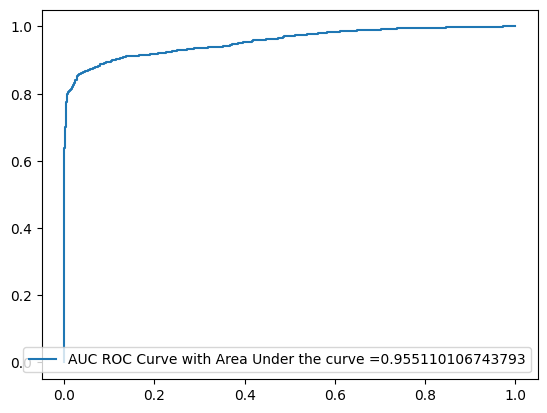

In [77]:
import joblib
model_lg = LogisticRegression(max_iter=10000,solver='liblinear',penalty='l2',C=c, class_weight='balanced')
# Evaluate at different thresholds
thresholds_to_test = [0.2, 0.3, 0.4, 0.5]
for threshold in thresholds_to_test:
    model_lg.fit(X_train_resampled,y_train_resampled)
    # Get predicted probabilities on the validation set
    y_pred_proba = model_lg.predict_proba(X_test_resampled)[:, 1]  # Probability of positive class
    evaluate_at_threshold(y_test_resampled, y_pred_proba, threshold)

# Save model in Pickle format
model_filename = f'my_model.joblib'  # Choose a suitable filenam
joblib.dump(model_lg, model_filename)  # Serialize the model to the file
print("Model saved successfully!")

fpr, tpr, thresholds = roc_curve(y_test_resampled,  y_pred_proba)
auc = roc_auc_score(y_test_resampled, y_pred_proba)
plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
plt.legend(loc=4)
plt.show()


Althrough Model has best performance around 0.2 t0 0.3 threshold
but we are saving on this list just for reference [0.2, 0.3, 0.4, 0.5]


just to mention smote and smote-een use same method for random over sampling
the reason for smote-een is Hybrid (Oversampling + Undersampling).

## Just to take overview we are going to run all estimator

In [78]:
import sklearn.metrics as sm
from sklearn.utils import all_estimators
estimators = all_estimators(type_filter='classifier')
model_name=[]
model_precision=[]
for name, get_model in estimators:
    try:
        model = get_model()
        model.fit(X_train_resampled,y_train_resampled)
        pred_y=model.predict(X_test_resampled)
        model_precision.append(sm.precision_score(y_test_resampled, pred_y))
        model_name.append(name)
    except Exception as e:
        print('Unable to import', name)
        print(e)

d:\Detecting Credit Card Fraud\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Unable to import CategoricalNB
Negative values in data passed to CategoricalNB (input X)
Unable to import ClassifierChain
_BaseChain.__init__() missing 1 required positional argument: 'base_estimator'
Unable to import ComplementNB
Negative values in data passed to ComplementNB (input X)


d:\Detecting Credit Card Fraud\.venv\Lib\site-packages\sklearn\semi_supervised\_label_propagation.py:230: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer
d:\Detecting Credit Card Fraud\.venv\Lib\site-packages\sklearn\semi_supervised\_label_propagation.py:230: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer
d:\Detecting Credit Card Fraud\.venv\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
d:\Detecting Credit Card Fraud\.venv\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
d:\Detecting Credit Card Fraud\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the o

Unable to import MultiOutputClassifier
MultiOutputClassifier.__init__() missing 1 required positional argument: 'estimator'
Unable to import MultinomialNB
Negative values in data passed to MultinomialNB (input X)
Unable to import OneVsOneClassifier
OneVsOneClassifier.__init__() missing 1 required positional argument: 'estimator'
Unable to import OneVsRestClassifier
OneVsRestClassifier.__init__() missing 1 required positional argument: 'estimator'
Unable to import OutputCodeClassifier
OutputCodeClassifier.__init__() missing 1 required positional argument: 'estimator'


d:\Detecting Credit Card Fraud\.venv\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Unable to import RadiusNeighborsClassifier
No neighbors found for test samples array([   0,    1,    2, ..., 2892, 2893, 2894], dtype=int64), you can try using larger radius, giving a label for outliers, or considering removing them from your dataset.
Unable to import StackingClassifier
StackingClassifier.__init__() missing 1 required positional argument: 'estimators'
Unable to import VotingClassifier
VotingClassifier.__init__() missing 1 required positional argument: 'estimators'


In [79]:
results=pd.DataFrame({"Model Name":model_name , "Model precision":model_precision})
results

,Model Name,Model precision
0,AdaBoostClassifier,0.988620
1,BaggingClassifier,0.983949
2,BernoulliNB,0.980817
3,CalibratedClassifierCV,0.984714
4,DecisionTreeClassifier,0.969671
5,DummyClassifier,0.524007
6,ExtraTreeClassifier,0.846740
7,ExtraTreesClassifier,0.996251
8,GaussianNB,0.964448
9,GaussianProcessClassifier,0.983333


In [80]:
# rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)
# X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)
# X_test_resampled, y_test_resampled = rus.fit_resample(X_test, y_test)

# #  SMOTE (Synthetic Minority Over-sampling Technique)
# smote = SMOTE(sampling_strategy='auto', random_state=42 )

# X_train_resampled = column_trans_2.transform(X_train_resampled)
# X_test_resampled = column_trans_2.transform(X_test_resampled)

# X_train_resampled, y_train_resampled = smote.fit_resample(X_train_resampled, y_train_resampled)
# X_test_resampled, y_test_resampled = smote.fit_resample(X_test_resampled, y_test_resampled)

In [81]:
# pipe = make_pipeline( SMOTE(sampling_strategy='auto', random_state=42),LogisticRegression(max_iter=10000,solver='liblinear',penalty='l2',C=0.001, class_weight='balanced'))
# weights = np.linspace(0.005, 0.25, 10)

# gsc = GridSearchCV(
#     estimator=pipe,
#     param_grid={
#         'smote__sampling_strategy' : weights
#     },
#     scoring='f1',
#     cv=3
# )
# grid_result = gsc.fit(X_train_resampled, y_train_resampled)

# print("Best parameters : %s" % grid_result.best_params_)
# weight_f1_score_df = pd.DataFrame({ 'score': grid_result.cv_results_['mean_test_score'],
#                                    'weight': weights })
# weight_f1_score_df.plot(x='weight')